# One Way (Between) Analysis of Variance (ANOVA)

In [24]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import savingfigR as sf 
import pingouin as pg 
import pandas as pd 
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

## Three Group Example in Python

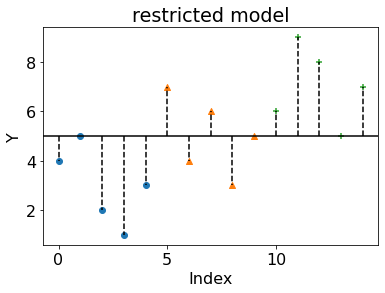

In [25]:
Y = np.array([4,5,2,1,3,7,4,6,3,5,6,9,8,5,7])
X = np.arange(0, len(Y))
myFac = np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3])

fig= plt.figure()
plt.scatter(X[myFac==1], Y[myFac==1], marker='o')
plt.scatter(X[myFac==2], Y[myFac==2], marker='^')
plt.scatter(X[myFac==3], Y[myFac==3], marker='+')
plt.axhline(np.mean(Y), c='k')
for i in X:
    plt.plot([i, i], [np.mean(Y), Y[i]], c='k', ls='--')
plt.xlabel('Index')
plt.ylabel('Y')
plt.title('restricted model')
plt.show()

sf.best_save(fig, 'restricted_model')

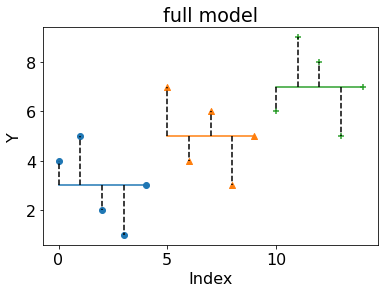

In [26]:
fig = plt.figure()
plt.scatter(X[myFac==1], Y[myFac==1], marker='o')
plt.scatter(X[myFac==2], Y[myFac==2], marker='^')
plt.scatter(X[myFac==3], Y[myFac==3], marker='+')
plt.plot([np.min(X[myFac==1]),np.max(X[myFac==1])], [np.mean(Y[myFac==1]), np.mean(Y[myFac==1])], c='tab:blue')
plt.plot([np.min(X[myFac==2]),np.max(X[myFac==2])], [np.mean(Y[myFac==2]), np.mean(Y[myFac==2])], c='tab:orange')
plt.plot([np.min(X[myFac==3]),np.max(X[myFac==3])], [np.mean(Y[myFac==3]), np.mean(Y[myFac==3])], c='tab:green')
for i in X:
    if myFac[i] == 1: 
        plt.plot([i, i], [np.mean(Y[myFac==1]), Y[i]], c='k', ls='--')
    elif myFac[i] == 2:
        plt.plot([i, i], [np.mean(Y[myFac==2]), Y[i]], c='k', ls='--')
    elif myFac[i] == 3: 
        plt.plot([i, i], [np.mean(Y[myFac==3]), Y[i]], c='k', ls='--')
plt.xlabel('Index')
plt.ylabel('Y')
plt.title('full model')
plt.show()

sf.best_save(fig, 'full_model')

In [27]:
df = pd.DataFrame(np.vstack((myFac, Y)).T, columns=['IVO', 'Y'])
m1 = pg.anova(data=df, dv='Y', between='IVO')
print(m1)

  Source  ddof1  ddof2    F     p-unc       np2
0    IVO      2     12  8.0  0.006196  0.571429


In [5]:
m2 = ols('Y ~ C(IVO)', data=df).fit() 
m2.summary()

/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     8.000
Date:                Tue, 21 Dec 2021   Prob (F-statistic):            0.00620
Time:                        15:48:54   Log-Likelihood:                -26.483
No. Observations:                  15   AIC:                             58.97
Df Residuals:                      12   BIC:                             61.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0000      0.707      4.243      0.001       1.459       4.541
C(IVO)[T.2]     2.0000      1.000      2.000      0.069      -0.179       4.179
C(IVO)[T.3]     4.0000      1.000      4.000      0.002       1.821       6.179
==============================================================================
Omnibus:                        2.603   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.056
Skew:                           0.000   Prob(JB):                        0.590
Kurtosis:                       1.700   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# can't run F-test on linear model 

## Testing Normality

In [7]:
stats.shapiro(Y[0:5])

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [8]:
stats.shapiro(Y[5:10])

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [9]:
stats.shapiro(Y[10:16])

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

## Testing Homogeneity of Variances

In [10]:
stats.bartlett(Y[0:5], Y[5:10], Y[10:16])

BartlettResult(statistic=0.0, pvalue=1.0)

## Follow up Mean Comparison's

In [23]:
pval_1v2 = stats.ttest_ind(Y[0:5], Y[5:10], alternative = "two-sided")[1] # G1 vs G2
pval_1v3 = stats.ttest_ind(Y[0:5], Y[10:16], alternative = "two-sided")[1] # G1 vs G3
pval_2v3 = stats.ttest_ind(Y[5:10], Y[10:16], alternative = "two-sided")[1] # G2 vs G3
pvals = np.array([pval_1v2, pval_1v3, pval_2v3])
p_adjusted = multipletests(pvals, method='holm')[1][:]
print(p_adjusted)

[0.16103248 0.01184932 0.16103248]


## ANOVA Effect Size in Python

In [12]:
m1.F # F-statistic 

0    8.0
Name: F, dtype: float64

In [13]:
m1.np2 # partial eta squared 

0    0.571429
Name: np2, dtype: float64

In [14]:
# omega squared 

## Power Analysis on ANOVA

In [15]:
pg.power_anova(m1.np2, 3, n=None, power=0.8, alpha=0.05) # this isn't correct

3.6182007042063735

## Quick Plot of the Data

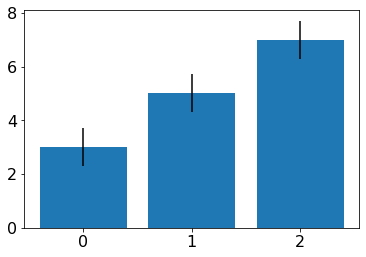

In [16]:
group_x = np.array([np.mean(Y[0:5]), np.mean(Y[5:10]), np.mean(Y[10:16])])
group_ste = np.array([np.std(Y[0:5], ddof=1) / np.sqrt(len(Y[0:5])), np.std(Y[5:10], ddof=1) / np.sqrt(len(Y[5:10])), np.std(Y[10:16], ddof=1)/ np.sqrt(len(Y[10:16]))])

fig = plt.figure()
plt.bar(np.arange(0,3), group_x)
plt.errorbar(np.arange(0,3), group_x, group_ste, ls='None',c='k')
plt.show()

sf.best_save(fig, 'quickBox')

## Graphing with GG Plot - Bar Plots

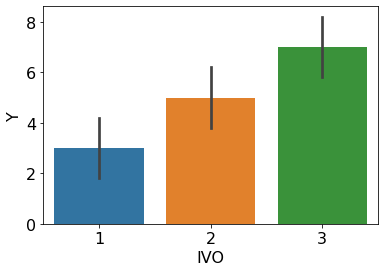

In [17]:
# I think the closest thing here is to use seaborn 

fig = plt.figure()
sns.barplot(x='IVO', y='Y', data=df)
plt.show()
sf.best_save(fig, 'sns_bar')

## Graphing with GG Plot - Box and Whisker

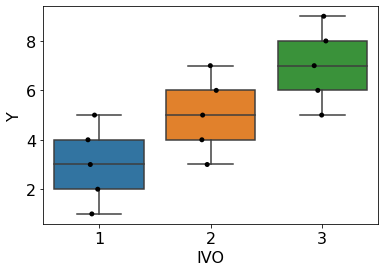

In [18]:
fig = plt.figure()
sns.boxplot(x='IVO', y='Y', data=df)
sns.stripplot(x='IVO', y='Y', data=df, color='k')
plt.show()
sf.best_save(fig, 'sns_boxwhiskers')

## Kruskal Wallis 

In [19]:
stats.kruskal(Y[0:5], Y[5:10], Y[10:16])

KruskalResult(statistic=8.115942028985506, pvalue=0.017284052654398252)